In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


In [98]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
sample_submission = pd.read_csv('./data/SampleSubmission.csv')

## Exploratory Data Analysis

In [99]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [100]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [101]:
sample_submission.head()

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


In [102]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (12079, 14)
The shape of the test set is: (1202, 13)


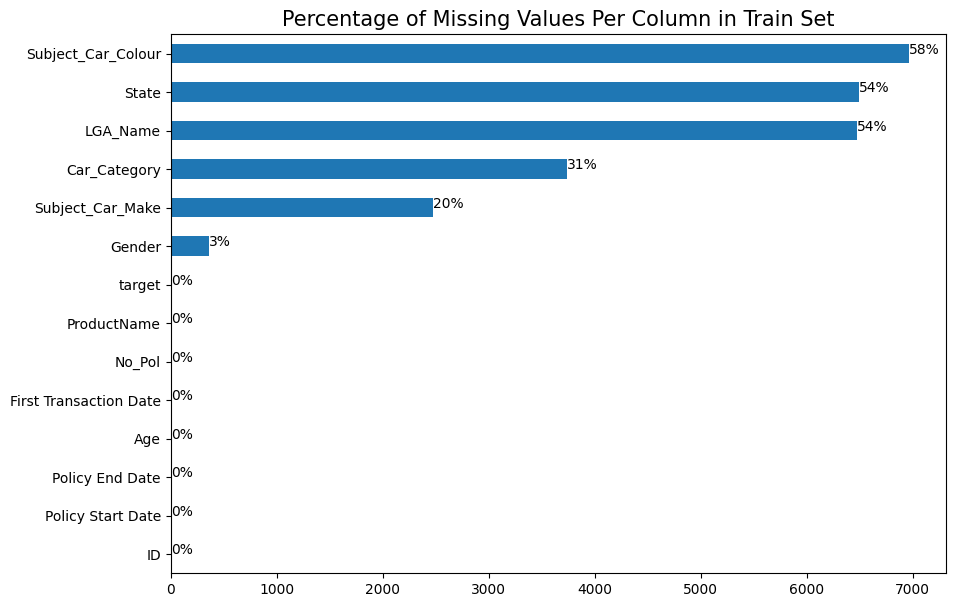

In [103]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [104]:
train[train['Age'] < 18]. count()

ID                        556
Policy Start Date         556
Policy End Date           556
Gender                    534
Age                       556
First Transaction Date    556
No_Pol                    556
Car_Category              356
Subject_Car_Colour        169
Subject_Car_Make          429
LGA_Name                  225
State                     225
ProductName               556
target                    556
dtype: int64

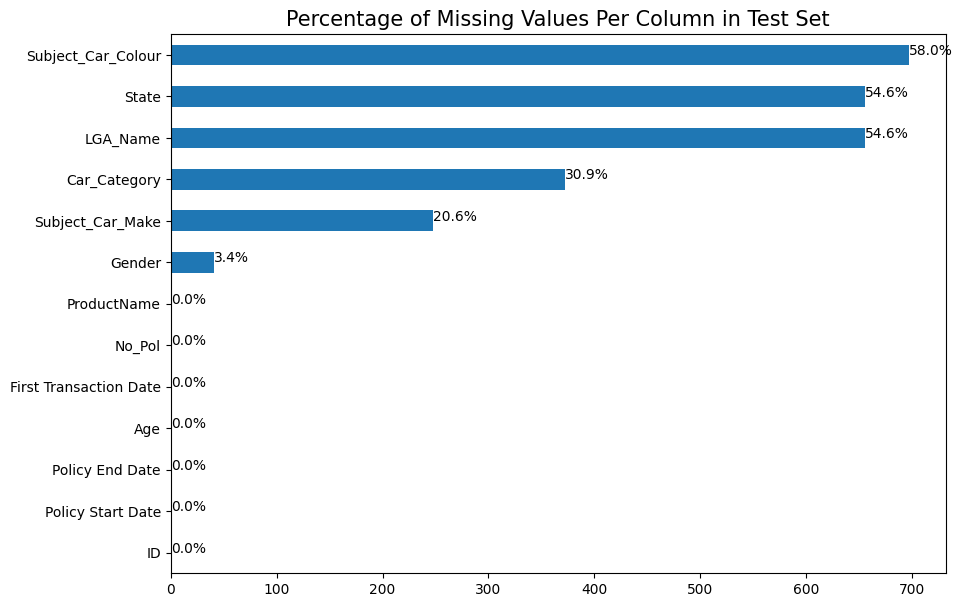

In [105]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

## Data Preprocessing

In [106]:

train['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])
train['Policy End Date'] = pd.to_datetime(train['Policy End Date'])
train['First Transaction Date'] = pd.to_datetime(train['First Transaction Date'])

test['Policy Start Date'] = pd.to_datetime(test['Policy Start Date'])
test['Policy End Date'] = pd.to_datetime(test['Policy End Date'])
test['First Transaction Date'] = pd.to_datetime(test['First Transaction Date'])

## Handle Missing Values

In [107]:
def front_fill_data(data, columns):
    for column in columns:
        data[column] = data[column].fillna(method='ffill')
    return data

front_fill_columns = ['Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']

front_filled_train = front_fill_data(train, front_fill_columns)
front_filled_test = front_fill_data(test, front_fill_columns)


/var/folders/0n/p9ms0b591cg7_09nh12318dr0000gn/T/ipykernel_33677/4060081857.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column] = data[column].fillna(method='ffill')


In [108]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Red,TOYOTA,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Red,TOYOTA,Lagos,Lagos,Muuve,1


In [109]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,Ford,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,Black,TOYOTA,Wuse 11,Abuja,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,Female,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


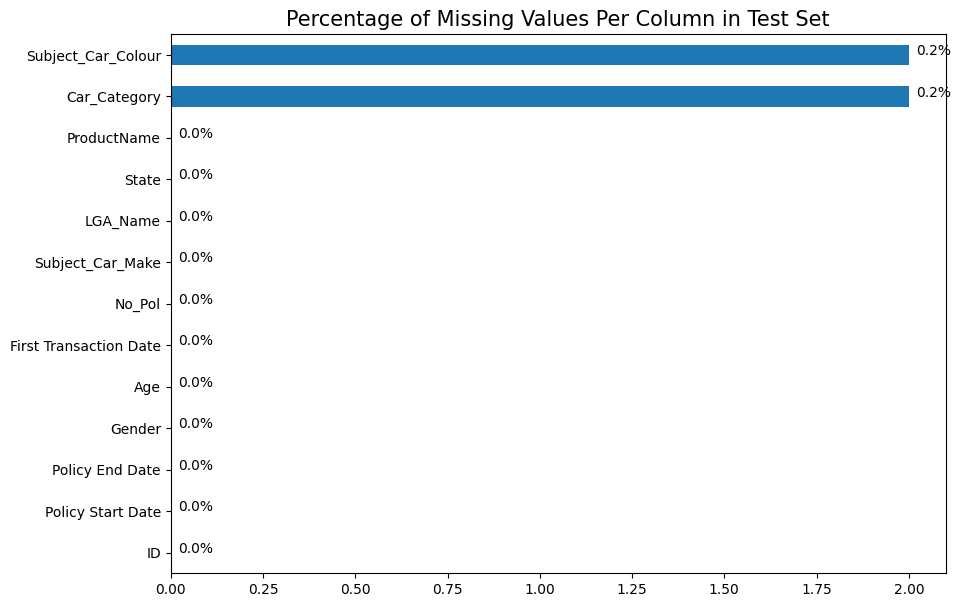

In [110]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [111]:
def clean_age(age):
    if age < 18:
        return np.nan  
    return age

In [112]:
train['Age'] = train['Age'].apply(clean_age)
test['Age'] = test['Age'].apply(clean_age)

age_median = train['Age'].mean()
age_median_t = train['Age'].mean()
train['Age'].fillna(age_median, inplace=True)
test['Age'].fillna(age_median_t, inplace=True)

/var/folders/0n/p9ms0b591cg7_09nh12318dr0000gn/T/ipykernel_33677/4005569889.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(age_median, inplace=True)
/var/folders/0n/p9ms0b591cg7_09nh12318dr0000gn/T/ipykernel_33677/4005569889.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

## Feature Engineering

In [113]:
train['Policy Duration'] = (train['Policy End Date'] - train['Policy Start Date']).dt.days
train['Customer Tenure'] = (train['Policy Start Date'] - train['First Transaction Date']).dt.days
test['Policy Duration'] = (test['Policy End Date'] - test['Policy Start Date']).dt.days
test['Customer Tenure'] = (test['Policy Start Date'] - test['First Transaction Date']).dt.days

today = pd.Timestamp.today()
train['Recency'] = (today - train['Policy End Date']).dt.days
test['Recency'] = (today - test['Policy End Date']).dt.days

## Encoding Categorical Values

In [114]:

categorical_columns = ['Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = encoder.fit_transform(train[categorical_columns])
encoded_test = encoder.transform(test[categorical_columns])

encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

train = train.drop(columns=categorical_columns).reset_index(drop=True)
test = test.drop(columns=categorical_columns).reset_index(drop=True)

train = pd.concat([train, encoded_train_df], axis=1)
test = pd.concat([test, encoded_test_df], axis=1)

In [115]:
X = train.drop(columns=['ID', 'target', 'Policy Start Date', 'Policy End Date', 'First Transaction Date'])
y = train['target']
X_test = test.drop(columns=['ID', 'Policy Start Date', 'Policy End Date', 'First Transaction Date'])

In [116]:
scaler = StandardScaler()
numerical_columns = ['Age', 'No_Pol', 'Policy Duration', 'Customer Tenure', 'Recency']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [118]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

RandomForestClassifier(n_estimators=200, random_state=42)

In [119]:
train_predictions = model.predict(X)

f1 = f1_score(y, train_predictions)
precision = precision_score(y, train_predictions)
recall = recall_score(y, train_predictions)
conf_matrix = confusion_matrix(y, train_predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.8911
Precision: 0.9446
Recall: 0.8433
Confusion Matrix:
[[10552    72]
 [  228  1227]]


In [120]:
# Feature importance
feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

feature_importances

,importance
Recency,1.531612e-01
Age,1.276471e-01
Policy Duration,5.292676e-02
No_Pol,3.330115e-02
ProductName_CarSafe,3.288512e-02
...,...
Subject_Car_Make_Buik,7.072631e-08
LGA_Name_Oyo West,7.167456e-09
LGA_Name_Akoko North West,0.000000e+00
Customer Tenure,0.000000e+00


In [121]:
test_predictions = model.predict(X_test)

In [122]:
test_predictions = model.predict(X_test)
pd.set_option('display.max_rows', 20)

pd.DataFrame(test_predictions).value_counts()

0
0    1181
1      21
Name: count, dtype: int64

In [123]:
sample_submission['target'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)